In [1]:
%load_ext autoreload
%autoreload 2

import os
import glob

import pandas as pd
from LogParser import parse_log_file
from pprint import pprint

import LogParser


In [2]:
log_dir = r"C:\Users\Admin\Github\autoliftout\liftout\log\cryo_landing_2022-02-22.114502"

statistics = parse_log_file(log_dir)

In [3]:
pprint(dict(statistics["click"]))

print("-"*20)
pprint(dict(statistics["ml"]))

print("-"*20)

print("-"*20)
pprint(dict(statistics["crosscorrelation"]))

# pprint(dict(statistics["gamma"]))

print("-"*20)
pprint(dict(statistics["stage"]))

{'Failure': 0,
 'Finished': 0,
 'Initialisation': 0,
 'Landing': 48,
 'Liftout': 29,
 'MillJCut': 12,
 'MillTrench': 12,
 'Polishing': 4,
 'Reset': 0,
 'Setup': 54,
 'Thinning': 44}
--------------------
{'image_centre': [15, 15],
 'lamella_centre': [7, 41],
 'lamella_edge': [7, 16],
 'landing_post': [7, 16],
 'needle_tip': [24, 26]}
--------------------
--------------------
{'Total': 13, 'True': 12}
--------------------
{'10e4f48c-f48a-48cd-baef-0e42a7ef44f9': {'Failure': [0, 0],
                                          'Finished': [0, 0],
                                          'Initialisation': [datetime.datetime(2022, 2, 25, 11, 2, 18),
                                                             datetime.datetime(2022, 2, 25, 11, 2, 34)],
                                          'Landing': [0, 0],
                                          'Liftout': [0, 0],
                                          'MillJCut': [0, 0],
                                          'MillTrench': [0, 

Generating Run Statistics and Plots


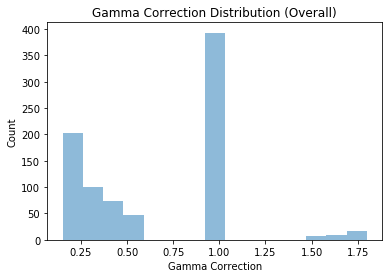

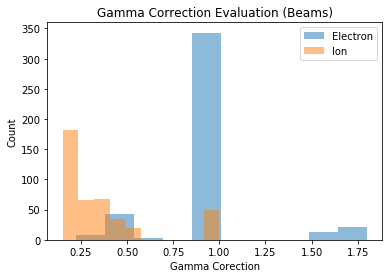

                true  total  false  percentage
image_centre      15     15      0  100.000000
lamella_centre     7     41     34   17.073171
needle_tip        24     26      2   92.307692
lamella_edge       7     16      9   43.750000
landing_post       7     16      9   43.750000
c06001c5-a7ea-4def-91fe-1adcd5397fb6
2fe2dd91-241e-4229-b463-70fcf83f528a
5d40159f-fa5d-44a3-b14f-c4293375a7dd
bad918c7-8b61-42d3-ac5e-ad7f1b3c69e0
10e4f48c-f48a-48cd-baef-0e42a7ef44f9


<Figure size 432x288 with 0 Axes>

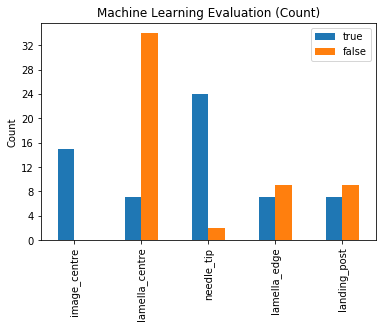

<Figure size 432x288 with 0 Axes>

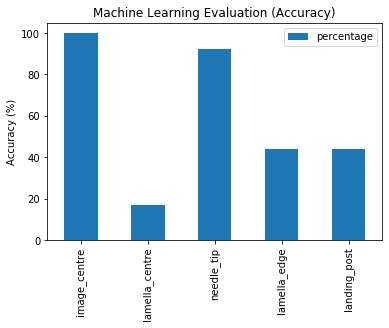

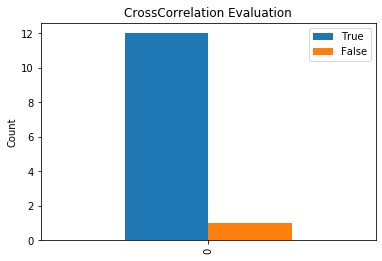

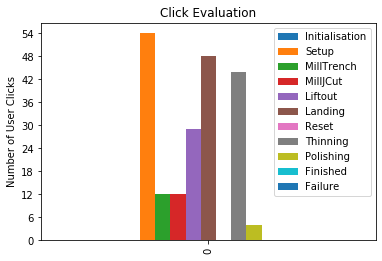

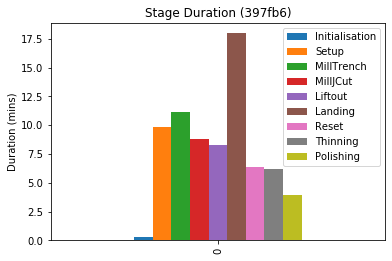

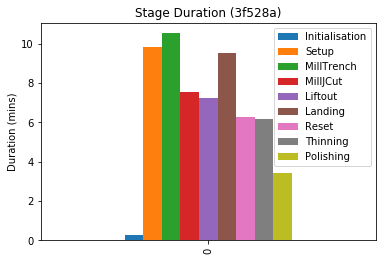

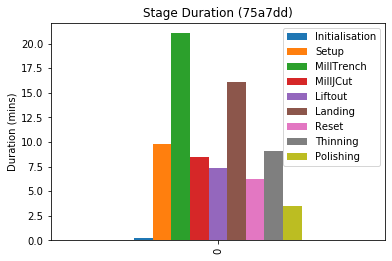

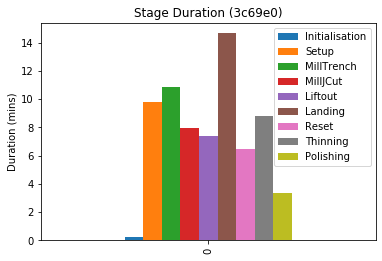

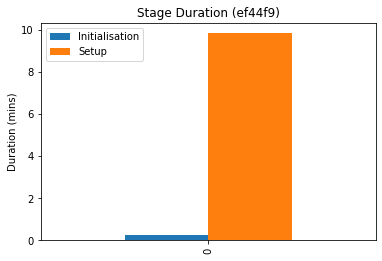

In [4]:
report_statistics = LogParser.generate_report_data(statistics, log_dir)

In [5]:
imgs = glob.glob(os.path.join(log_dir, "report", "*.png"))
pprint(imgs)

['C:\\Users\\Admin\\Github\\autoliftout\\liftout\\log\\cryo_landing_2022-02-22.114502\\report\\10e4f48c-f48a-48cd-baef-0e42a7ef44f9_duration.png',
 'C:\\Users\\Admin\\Github\\autoliftout\\liftout\\log\\cryo_landing_2022-02-22.114502\\report\\2fe2dd91-241e-4229-b463-70fcf83f528a_duration.png',
 'C:\\Users\\Admin\\Github\\autoliftout\\liftout\\log\\cryo_landing_2022-02-22.114502\\report\\5d40159f-fa5d-44a3-b14f-c4293375a7dd_duration.png',
 'C:\\Users\\Admin\\Github\\autoliftout\\liftout\\log\\cryo_landing_2022-02-22.114502\\report\\bad918c7-8b61-42d3-ac5e-ad7f1b3c69e0_duration.png',
 'C:\\Users\\Admin\\Github\\autoliftout\\liftout\\log\\cryo_landing_2022-02-22.114502\\report\\c06001c5-a7ea-4def-91fe-1adcd5397fb6_duration.png',
 'C:\\Users\\Admin\\Github\\autoliftout\\liftout\\log\\cryo_landing_2022-02-22.114502\\report\\cc_accuracy.png',
 'C:\\Users\\Admin\\Github\\autoliftout\\liftout\\log\\cryo_landing_2022-02-22.114502\\report\\clicks.png',
 'C:\\Users\\Admin\\Github\\autoliftout\\lif

In [22]:
exemplar_filenames = ["ref_lamella_low_res_eb", "ref_trench_high_res_ib", "jcut_highres_ib",
                          "needle_liftout_landed_highres_ib", "landing_lamella_final_cut_highres_ib", "sharpen_needle_final_ib",
                          "thin_lamella_stage_2_ib", "polish_lamella_final_ib"]
from autoscript_sdb_microscope_client.structures import AdornedImage
import matplotlib.pyplot as plt

from PIL import Image

exem_imgs = dict.fromkeys(statistics["stage"], [])

for sp_id in statistics["stage"]:
    
    
    for img_basename in exemplar_filenames:
        fname = os.path.join(log_dir, sp_id, f"{img_basename}.tif")
        fname_png = os.path.join(log_dir, sp_id, f"{img_basename}.png")
        
        adorned_img = AdornedImage.load(fname)
        img = Image.fromarray(adorned_img.data)
        img.save(fname_png)
        
        del img
        img = Image.open(fname_png)
    
        exem_imgs[sp_id].append(fname_png)

#         plt.title(img_basename)
#         plt.imshow(img, cmap="gray")
#         plt.show()
        

pprint(exem_imgs)



{'42fc6b5d-4436-4b44-a8fd-0217af918811': ['C:\\Users\\Admin\\Github\\autoliftout\\liftout\\log\\logging_2022-02-17.151141\\42fc6b5d-4436-4b44-a8fd-0217af918811\\ref_lamella_low_res_eb.png',
                                          'C:\\Users\\Admin\\Github\\autoliftout\\liftout\\log\\logging_2022-02-17.151141\\42fc6b5d-4436-4b44-a8fd-0217af918811\\ref_trench_high_res_ib.png',
                                          'C:\\Users\\Admin\\Github\\autoliftout\\liftout\\log\\logging_2022-02-17.151141\\42fc6b5d-4436-4b44-a8fd-0217af918811\\jcut_highres_ib.png',
                                          'C:\\Users\\Admin\\Github\\autoliftout\\liftout\\log\\logging_2022-02-17.151141\\42fc6b5d-4436-4b44-a8fd-0217af918811\\needle_liftout_landed_highres_ib.png',
                                          'C:\\Users\\Admin\\Github\\autoliftout\\liftout\\log\\logging_2022-02-17.151141\\42fc6b5d-4436-4b44-a8fd-0217af918811\\landing_lamella_final_cut_highres_ib.png',
                                 

In [26]:
from liftout import tools 

# TODO: sample exemplar images from gui


report_dir = os.path.join(log_dir, "report")
page_title_text='AutoLiftout Report'
title_text = f"AutoLiftout Report"
text = f"AutoLiftout report for run: {log_dir}"
gamma_text = "Gamma Correction Statistics"
ml_stats_text = "Machine Learning Statistics"
stage_duration_text = "Stage Duration Statistics"
clicks_text = "User Clicks"

duration_imgs = glob.glob(os.path.join(report_dir, "*duration.png"))


html = f"""
        <html>
            <head>
                <title>{page_title_text}</title>
                <link rel="stylesheet" href='{os.path.join(os.path.dirname(tools.__file__), "style.css")}'>

            </head>
            <body>
                <h1 style="text-align:center">{title_text}</h1>
                <p style="text-align:center">{text}</p>
                
                <div id="stats">
                    
                    <h2>{clicks_text}</h2>
                    <div id="click">
                        <img src='{os.path.join(report_dir, "clicks.png")}' width="700">
                    </div>
                    
                    <h2>{gamma_text}</h2>
                    <div id="gamma">
                        <img src='{os.path.join(report_dir, "gamma_statistics.png")}' width="700">
                    </div>
        
                    <h2>{ml_stats_text}</h2>
                    <div id="ml">
                        <img src='{os.path.join(report_dir, "ml_statistics.png")}' width="700">
                        <img src='{os.path.join(report_dir, "ml_accuracy.png")}' width="700">
                    </div>
                    
                    <h2>{stage_duration_text}</h2>
                    <div id="stage_duration">
                        <img src='{os.path.join(report_dir, duration_imgs[0])}' width="700">
                        <img src='{exem_imgs["42fc6b5d-4436-4b44-a8fd-0217af918811"][0]}' width="150">
                        <img src='{exem_imgs["42fc6b5d-4436-4b44-a8fd-0217af918811"][1]}' width="150">
                        <img src='{exem_imgs["42fc6b5d-4436-4b44-a8fd-0217af918811"][2]}' width="150">
                        <img src='{exem_imgs["42fc6b5d-4436-4b44-a8fd-0217af918811"][3]}' width="150">
                        <img src='{exem_imgs["42fc6b5d-4436-4b44-a8fd-0217af918811"][4]}' width="150">
                        <img src='{exem_imgs["42fc6b5d-4436-4b44-a8fd-0217af918811"][5]}' width="150">
                        <img src='{exem_imgs["42fc6b5d-4436-4b44-a8fd-0217af918811"][6]}' width="150">
                        <img src='{exem_imgs["42fc6b5d-4436-4b44-a8fd-0217af918811"][7]}' width="150">
                    </div>       
                    
                    <h2>{stage_duration_text}</h2>
                    <div id="stage_duration">
                        <img src='{os.path.join(report_dir, duration_imgs[0])}' width="700">
                        <img src='{exem_imgs["85a188d6-82e0-4601-b419-48e6bbba9fb6"][0]}' width="150">
                        <img src='{exem_imgs["85a188d6-82e0-4601-b419-48e6bbba9fb6"][1]}' width="150">
                        <img src='{exem_imgs["85a188d6-82e0-4601-b419-48e6bbba9fb6"][2]}' width="150">
                        <img src='{exem_imgs["85a188d6-82e0-4601-b419-48e6bbba9fb6"][3]}' width="150">
                        <img src='{exem_imgs["85a188d6-82e0-4601-b419-48e6bbba9fb6"][4]}' width="150">
                        <img src='{exem_imgs["85a188d6-82e0-4601-b419-48e6bbba9fb6"][5]}' width="150">
                        <img src='{exem_imgs["85a188d6-82e0-4601-b419-48e6bbba9fb6"][6]}' width="150">
                        <img src='{exem_imgs["85a188d6-82e0-4601-b419-48e6bbba9fb6"][7]}' width="150">

                    </div>  
                    
                </div>
                                
            </body>
        </html>
        """
# 3. Write the html string as an HTML file
with open(os.path.join(log_dir, "html_report.html"), "w") as f:
    f.write(html)

print("HTML Report Generated")

HTML Report Generated


In [335]:


# https://www.justintodata.com/generate-reports-with-python/
# https://www.xlwings.org/blog/reporting-with-python

# CSS
# https://pythonhow.com/python-tutorial/flask/Adding-CSS-styling-to-your-website/
%load_ext autoreload
%autoreload 2
import logging
import datetime
import time
import glob

import os
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from random import shuffle

from PIL import Image

import os
import glob
from liftout.tools.LogParser import parse_log_file, plot_gamma_data, plot_ml_data, plot_state_dict
filenames = sorted(glob.glob(os.path.join(os.path.dirname(os.getcwd()), "log/run/**/*.log")))


def generate_html_report(logfile):
    
    log_path = os.path.dirname(logfile)
    img_path = os.path.join(log_path, "img")
    filenames = glob.glob(os.path.join(img_path ,"*.tif")) # images

    page_title_text='AutoLiftout Report'
    title_text = 'AutoLiftout Report'
    text = f"AutoLiftout report for run: {log_path}"
    gamma_text = "Gamma Correction Statistics"
    ml_stats_text = "Machine Learning Statistics"
    state_duration_text = "State Duration Statistics"
    
    print(f"Total Images: {len(filenames)}")
    seen_filenames = []
    
    img_text = f"{len(filenames)} images taken during run. "
    
    
    for filt_exp in ["sharpen", "liftout", "landing", "drift_correction", "jcut", "thinning"]:
        
        
        # filter to images we want.. e.g. sharpen only
        filt_filenames = list(filter(lambda x: filt_exp in os.path.basename(x), filenames))
        print(f"Processing {len(filt_filenames)} images for {filt_exp}")
    
        # need to convert tif images to png to display in html...
        NO_IMAGES_TO_DISPLAY = 10
        images = [np.asarray(Image.open(fname).convert("RGB")) for fname in filt_filenames[:NO_IMAGES_TO_DISPLAY]]
        if len(images) > 0:
            base_img = images[0]
            for img in images[1:]:
                base_img = np.hstack((base_img, img))


            img = Image.fromarray(base_img)
            img.save(os.path.join(log_path, f"{filt_exp}.png"))
            
            seen_filenames.append(filt_filenames)
        
    seen_filenames = [x for sublist in seen_filenames for x in sublist]

    
    unseen = [fname for fname in filenames if fname not in seen_filenames]
    
    print(f"Seen: {len(seen_filenames)}, Unseen: {len(unseen)}")
    # TODO: need some logic to decide which images to show, but just assume all are there for now
    

    # 2. Combine them together using a long f-string
    html = f'''
        <html>
            <head>
                <title>{page_title_text}</title>
                <link rel="stylesheet" href="../../../tools/style.css">

            </head>
            <body>
                <h1 style="text-align:center">{title_text}</h1>
                <p style="text-align:center">{text}</p>
                
                <div id="stats">
                    
                    <h2>{gamma_text}</h2>
                    <div id="gamma">
                        {df_gamma.describe().to_html()}
                        <img src='{os.path.join(log_path, "gamma_statistics.png")}' width="700">
                    </div>
        
                    <h2>{ml_stats_text}</h2>
                    <div id="ml">

                        {df_ml.to_html()}
                        <img src='{os.path.join(log_path, "ml_statistics.png")}' width="700">
                    </div>

                    <h2>{state_duration_text}</h2>
                    <div id="state">
                    
                        {df_state_duration.to_html()}
                        <img src='{os.path.join(log_path, "state_duration_statistics.png")}' width="700">
                    </div>
                </div>
                
                <h2>Liftout Images</h2>
                <p>{img_text}</p>
                
                <h3>Liftout</h3>
                <div style="text-align:center;"><img src='{os.path.join(log_path, "liftout.png")}' width="1500"></div>
                
                <h3>J-Cut</h3>
                <div style="text-align:center;""><img src='{os.path.join(log_path, "jcut.png")}' width="1500"></div>
                
                <h3>Drift Correction</h3>
                <div style="text-align:center;"><img src='{os.path.join(log_path, "drift_correction.png")}' width="1500"></div>
                
                <h3>Landing</h3>
                <div style="text-align:center;"><img src='{os.path.join(log_path, "landing.png")}' width="1500"></div>
                
                <h3>Sharpen Needle</h3>
                <div style="text-align:center;">
                <img src='{os.path.join(log_path, "sharpen.png")}' width="1500">
                </div>
                
                <h3>Thinning</h3>
                <div style="text-align:center;">
                <img src='{os.path.join(log_path, "thinning.png")}' width="1500">               
                </div>
                
            </body>
        </html>
        '''
    # 3. Write the html string as an HTML file
    with open(os.path.join(log_path, "html_report.html"), "w") as f:
        f.write(html)
        
    print("HTML Report Generated")

generate_html_report(logfile)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ImportError: cannot import name 'plot_gamma_data'